35352 121 241
[34484, 34485, 34486, 34487, 34488, 34489, 34490, 34491, 34492, 34493, 34494, 34495, 34496, 34497, 34498, 34499, 34500, 34501, 34502, 34503, 34504, 34505, 34506, 34507, 34508, 34509, 34510, 34511, 34512, 34513, 34514, 34515, 34516, 34517, 34518, 34519, 34520, 34521, 34522, 34523, 34524, 34525, 34526, 34527, 34528, 34529, 34530, 34531, 34532, 34533, 34534, 34535, 34536, 34537, 34538, 34539, 34540, 34541, 34542, 34543, 34544, 34545, 34546, 34547, 34548, 34549, 34550, 34551, 34552, 34553, 34554, 34555, 34556, 34557, 34558, 34559, 34560, 34561, 34562, 34563, 34564, 34565, 34566, 34567, 34568, 34569, 34570, 34571, 34572, 34573, 34574, 34575, 34576, 34577, 34578, 34579, 34580, 34581, 34582, 34583, 34584, 34585, 34586, 34587, 34588, 34589, 34590, 34591, 34592, 34593, 34594, 34595, 34596, 34597, 34598, 34599, 34600, 34601, 34602, 34603, 34604, 34605, 34606, 34607]
[   0    0   22 ...   -1 2401   -1]
[0 0 1 ... 0 1 0]


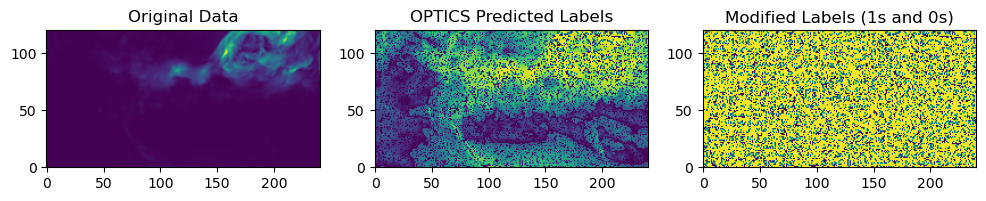

/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[   0   28   62 ...   -1   -1 2456]
[0 1 1 ... 0 0 1]


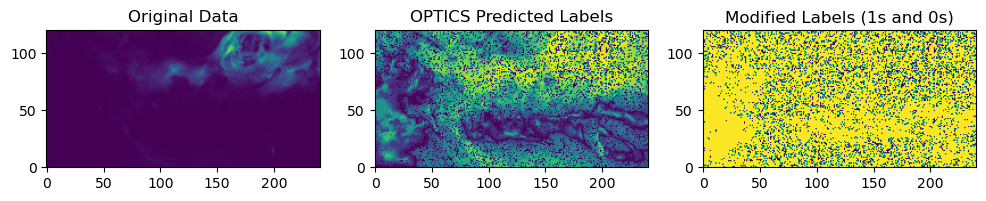

[   0    0   34 ... 2406   -1 2661]
[0 0 1 ... 1 0 1]


/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


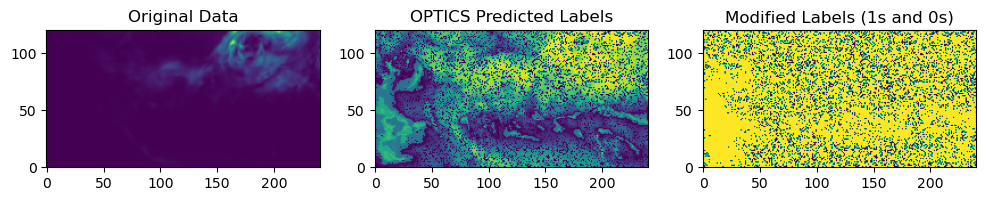

/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[   0   35   35 ... 2417 2382 2396]
[0 1 1 ... 1 1 1]


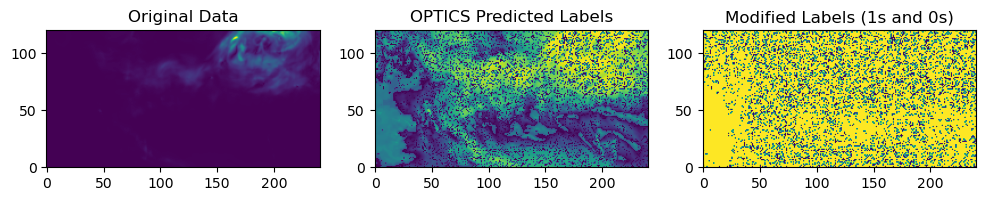

/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[   0   43   43 ...   -1   -1 2469]
[0 1 1 ... 0 0 1]


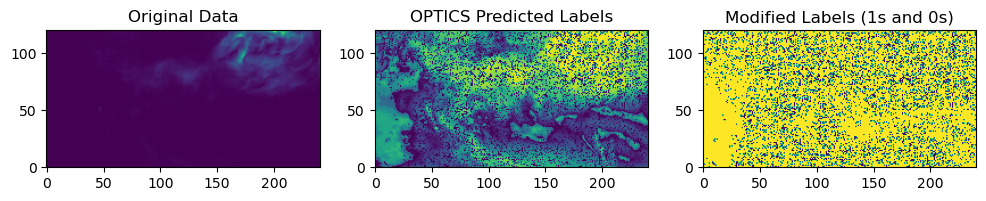

/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[  -1   18   12 ... 2586 2555 2531]
[0 1 1 ... 1 1 1]


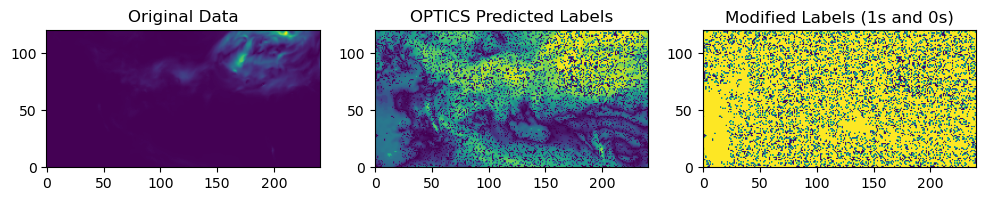

/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[  -1   52   58 ...   -1 2591 2581]
[0 1 1 ... 0 1 1]


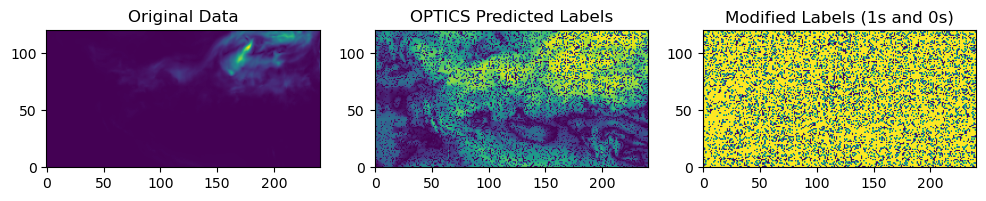

/Users/maloyd1/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[   0   52   -1 ... 2809 2785   -1]
[0 1 0 ... 1 1 0]


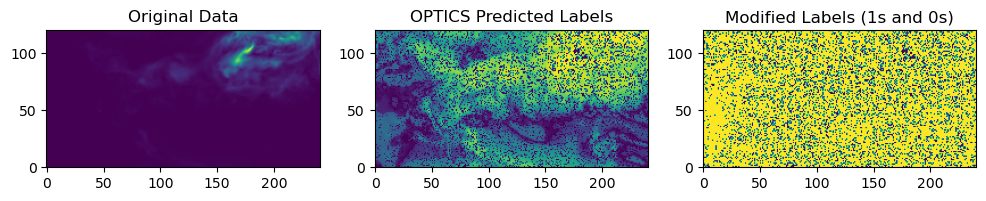

In [1]:
import os
import xarray as xr
import numpy as np
from netCDF4 import Dataset
import glob

file = 'data_1997_2020_30.nc'
fhadj = Dataset(file, mode='r')

v10 = fhadj.variables['v10'][:]
time = fhadj.variables['tme'][:]
times, row, col = v10.shape
print(times, row, col)

aprilList = []
indexList = []
timeList = []

for i in range(len(time)):
    if str(time[i][0:7]) == '2020-06':
        aprilList.append(v10[i])
        indexList.append(i)
        timeList.append(time[i])
print(indexList)

# %%
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Assuming your 2D array is named 'data_array'
# You may need to reshape it to a 1D array if it's not already

for i in range(len(indexList)):
    index = indexList[i]
    data_array = v10[index]

    # Assuming your 2D array is named 'data_array'
    # You may need to reshape it to a 1D array if it's not already
    data_array_1d = data_array.flatten().reshape(-1, 1)

    # Apply OPTICS clustering
    optics = OPTICS(n_jobs=-1)
    predicted_labels = optics.fit_predict(data_array_1d)

    print(predicted_labels)

    # Modify predicted labels to have 1 for clustered points and 0 for noise
    modified_labels = np.where(predicted_labels > 0, 1, 0)

    print(modified_labels)

    # Reshape the modified labels to the original shape
    modified_labels_reshaped = modified_labels.reshape(data_array.shape)

    # Plot the original data and the modified labels
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(data_array, cmap='viridis', origin='lower')
    plt.title('Original Data')

    plt.subplot(1, 3, 2)
    plt.imshow(predicted_labels.reshape(data_array.shape), cmap='viridis', origin='lower')
    plt.title('OPTICS Predicted Labels')

    plt.subplot(1, 3, 3)
    plt.imshow(modified_labels_reshaped, cmap='viridis', origin='lower')
    plt.title('Modified Labels (1s and 0s)')

    plt.show()

    #predicted_labeles_list.append(modified_labels_reshaped)

    np.savetxt('optics_output/' + timeList[i] + '.txt', modified_labels_reshaped, delimiter='\t', fmt='%d')


# %%
import glob

predicted_labels_list = []

files = glob.glob('optics_output/*.txt')

files.sort()

print(files)

for f in files:

    modified_labels_reshaped = np.loadtxt(f)
    predicted_labels_list.append(modified_labels_reshaped)

# %%
import os
import xarray as xr
import numpy as np

import glob
import os
from netCDF4 import Dataset
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt

import pandas as pd

# Directory where the folders m1997 to m2020 are located
base_directory = ""

# Lon (Y) and Lat (X) ranges
lon_range = (-110, 40)
lat_range = (-30, 30)


from datetime import datetime, timedelta


def convert_precision(april_data):
    output_List = []
    for kkk in range(len(april_data)):
        data_slice = april_data[kkk, :, :]
        indexList = []
        for i in range(121):
            for j in range(241):
                if (str(data_slice[i][j]) == '--'):
                    indexList.append((i, j))
        for a, b in indexList:
            data_slice[a][b] = -999
        data_slice[data_slice > 0] = 1
        data_slice[data_slice < 0] = 0
        output_List.append(data_slice)
    return output_List    


# Convert '1997 01' to a datetime object
def dateToList(date_str,hours_list):
    date_format = '%Y %m'
    start_date = datetime.strptime(date_str, date_format)
    # Define a list of hours
    # Initialize an empty list to store string representations
    date_strings = []
    # Generate string representations for each hour in the list
    for hours in hours_list:
        new_date = start_date + timedelta(hours=hours)
        date_strings.append(new_date.strftime('%Y-%m-%d %H:%M:%S'))
    # Print the result
    print("Original Date String:", start_date.strftime('%Y-%m-%d %H:%M:%S'))
    print("Date Strings for specified hours:", date_strings)
    return date_strings

# Iterate over the folders m1997 to m2020
year = 2020
file = '2020+06_DUOUT_iatp50_3M.nc'
fhadj = Dataset(file, mode='r')
date_name = '2020 06'
print(fhadj.variables.keys())
dufluxu_values = fhadj.variables['shape'][:, (fhadj.variables['lat'][:] >= lat_range[0]) & (fhadj.variables['lat'][:] <= lat_range[1]), (fhadj.variables['lon'][:] >= lon_range[0]) & (fhadj.variables['lon'][:] <= lon_range[1])]
result_values = dufluxu_values
april_data = result_values[:,:,:]
true_label = convert_precision(april_data)
data_slice = true_label[96]

import matplotlib.pyplot as plt

print(data_slice)
print(np.min(data_slice))
print(np.max(data_slice))

# Customize the contour plot as needed
plt.contourf(data_slice, cmap='jet')
plt.colorbar()  # Add colorbar for reference

# Customize plot labels, title, etc. if needed

# Show the plot or save it as an image
plt.show()


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from sklearn.metrics import roc_curve, auc
import numpy as np

true_label1 = np.array(true_label)
predicted_label1 = np.array(predicted_labels_list)

print(true_label1[0].shape)
_,R,C = true_label1.shape
precision_array = np.zeros((true_label1[0].shape))
recall_array = np.zeros((true_label1[0].shape))
f1score_array = np.zeros((true_label1[0].shape))
accuracy_array = np.zeros((true_label1[0].shape))
tp_tp_tn = np.zeros((true_label1[0].shape))

def calculate_tp_tn(y_true, y_pred):
    # Ensure the labels are binary (0 and 1)
    y_true_binary = np.where(y_true > 0, 1, 0)
    y_pred_binary = np.where(y_pred > 0, 1, 0)
    # True Positives (TP)
    tp = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    # True Negatives (TN)
    tn = np.sum((y_true_binary == 0) & (y_pred_binary == 0))
    return tp, tn

for i in range(R):
    for j in range(C):
        true_label_ll = true_label1[:,i,j]
        predicted_label_ll = predicted_label1[:,i,j]
        precision_array[i][j] = precision_score(true_label_ll,predicted_label_ll)
        recall_array[i][j] = recall_score(true_label_ll,predicted_label_ll)
        f1score_array[i][j] = f1_score(true_label_ll,predicted_label_ll)
        accuracy_array[i][j] = accuracy_score(true_label_ll,predicted_label_ll)
        tp, tn = calculate_tp_tn(true_label_ll,predicted_label_ll)
        tp_tp_tn[i][j] = tp/(tp+tn)

def calculate_roc_auc1(true_label, predicted_label):
    _, R, C = true_label.shape
    roc_auc_array = np.zeros((R, C))
    for i in range(R):
        for j in range(C):
            true_label_ll = true_label[:, i, j]
            predicted_label_ll = predicted_label[:, i, j]
            fpr, tpr, thresholds = roc_curve(true_label_ll, predicted_label_ll)
            roc_auc_array[i][j] = auc(fpr, tpr)
    roc_auc_array = np.nan_to_num(roc_auc_array)
    return roc_auc_array

true_label = np.array(true_label)
predicted_label = np.array(predicted_labels_list)
roc_auc_scores = calculate_roc_auc1(true_label, predicted_label)



def calculate_roc_auc(true_label, predicted_label):
    _, R, C = true_label.shape
    fpr_list = []
    tpr_list = []
    for i in range(R):
        for j in range(C):
            true_label_ll = true_label[:, i, j]
            predicted_label_ll = predicted_label[:, i, j]
            fpr, tpr, thresholds = roc_curve(true_label_ll, predicted_label_ll)
            tpr_list.append(tpr)
            fpr_list.append(fpr)
    return fpr_list, tpr_list

true_label = np.array(true_label)
predicted_label = np.array(predicted_labels_list)
fpr_list, tpr_list = calculate_roc_auc(true_label, predicted_label)
tpr_new_list = []
for t in tpr_list:
    if(np.isnan(t[0])):
        continue
    elif t.shape[0]== 3:
        tpr_new_list.append(t)

fpr_new_list = []
for t in fpr_list:
    if(np.isnan(t[0])):
        continue
    elif t.shape[0] == 3:
        fpr_new_list.append(t)

np.savetxt('tpr_optics.txt', tpr_new_list, delimiter='\t', fmt='%.8f')
np.savetxt('fpr_optics.txt', fpr_new_list, delimiter='\t', fmt='%.8f')

np.savetxt('precision_array_optics.txt', precision_array,delimiter='\t',fmt='%.4f')
np.savetxt('recall_array_optics.txt', recall_array,delimiter='\t',fmt='%.4f')
np.savetxt('f1score_array_optics.txt', f1score_array,delimiter='\t',fmt='%.4f')
np.savetxt('accuracy_array_optics.txt', accuracy_array,delimiter='\t',fmt='%.4f')
np.savetxt('roc_auc_score_optics.txt', roc_auc_scores,delimiter='\t',fmt='%.4f')
np.savetxt('tp_tp_tn_optics.txt', tp_tp_tn,delimiter='\t',fmt='%.4f')

def diffrentfigure(anomaly_map,name):
    plt.figure(figsize=(12, 6))
    plt.imshow(anomaly_map, cmap='jet', interpolation='nearest')
    cbar = plt.colorbar(label=name+' range')
    plt.title(name+' from OPTICS')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.savefig(name + '_optics_.png')

diffrentfigure(precision_array,'Precision')
diffrentfigure(recall_array,'Recall')
diffrentfigure(f1score_array,'f1-Socre')
diffrentfigure(accuracy_array,'Accuracy')
diffrentfigure(roc_auc_scores,'ROC-AUC Scores')
diffrentfigure(tp_tp_tn,'TP_(TP+TN)')
